In [333]:
import numpy as np
import seaborn as sns
import pandas as pd

## 1. Read the dataset and understand the features and target variable. (3points)

In [334]:
col=['Industrial_Risk','Management_Risk','Financial_Flexibility','Credibility','Competitiveness','Operating_Risk','Class']

In [335]:
bank_note=pd.read_csv("Qualitative_Bankruptcy.data.txt",names=col,delimiter=',')

In [336]:
bank_note.columns

Index(['Industrial_Risk', 'Management_Risk', 'Financial_Flexibility',
       'Credibility', 'Competitiveness', 'Operating_Risk', 'Class'],
      dtype='object')

In [337]:
bank_note.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [338]:
bank_note.groupby('Class').size()

Class
B     107
NB    143
dtype: int64

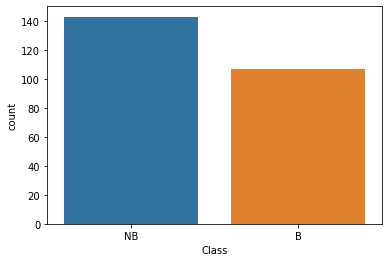

In [339]:
sns.countplot(bank_note['Class'])  

## 2. Encode independent features. You can use manual encoding (5 points)

In [340]:
col

['Industrial_Risk',
 'Management_Risk',
 'Financial_Flexibility',
 'Credibility',
 'Competitiveness',
 'Operating_Risk',
 'Class']

In [341]:
#Encoding P,N,A as 0,1,2 respectively and B ,NB as 0,1 
encoding={'P':0,'N':1,'A':2,'B':0,'NB':1
}

In [342]:
bank_note.replace(encoding,inplace=True)

## 3. Separate the dependent variable (class) from the data. (1 point)

In [343]:
bank_note_x=bank_note.drop('Class',axis=1)

In [344]:
bank_note_y=bank_note['Class']   

## 4. Check distribution of target column and independent features and comment your findings. ( 3 points)

In [345]:
bank_note_x.describe().T #independent Features  
#Data is evenly distributed as mean and median are almost equal

,count,mean,std,min,25%,50%,75%,max
Industrial_Risk,250.0,1.004,0.804096,0.0,0.0,1.0,2.0,2.0
Management_Risk,250.0,1.028,0.724788,0.0,1.0,1.0,2.0,2.0
Financial_Flexibility,250.0,1.068,0.722123,0.0,1.0,1.0,2.0,2.0
Credibility,250.0,0.992,0.791481,0.0,0.0,1.0,2.0,2.0
Competitiveness,250.0,0.860,0.755435,0.0,0.0,1.0,1.0,2.0
Operating_Risk,250.0,0.912,0.733764,0.0,0.0,1.0,1.0,2.0


In [346]:
bank_note_y.value_counts() 

1    143
0    107
Name: Class, dtype: int64

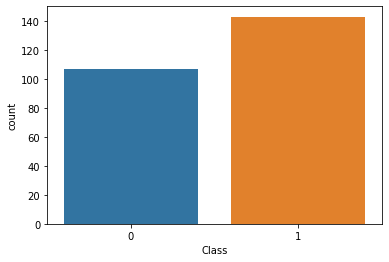

In [347]:
sns.countplot(bank_note_y)  #Non-Bankruptcy class is 1 which has more number data

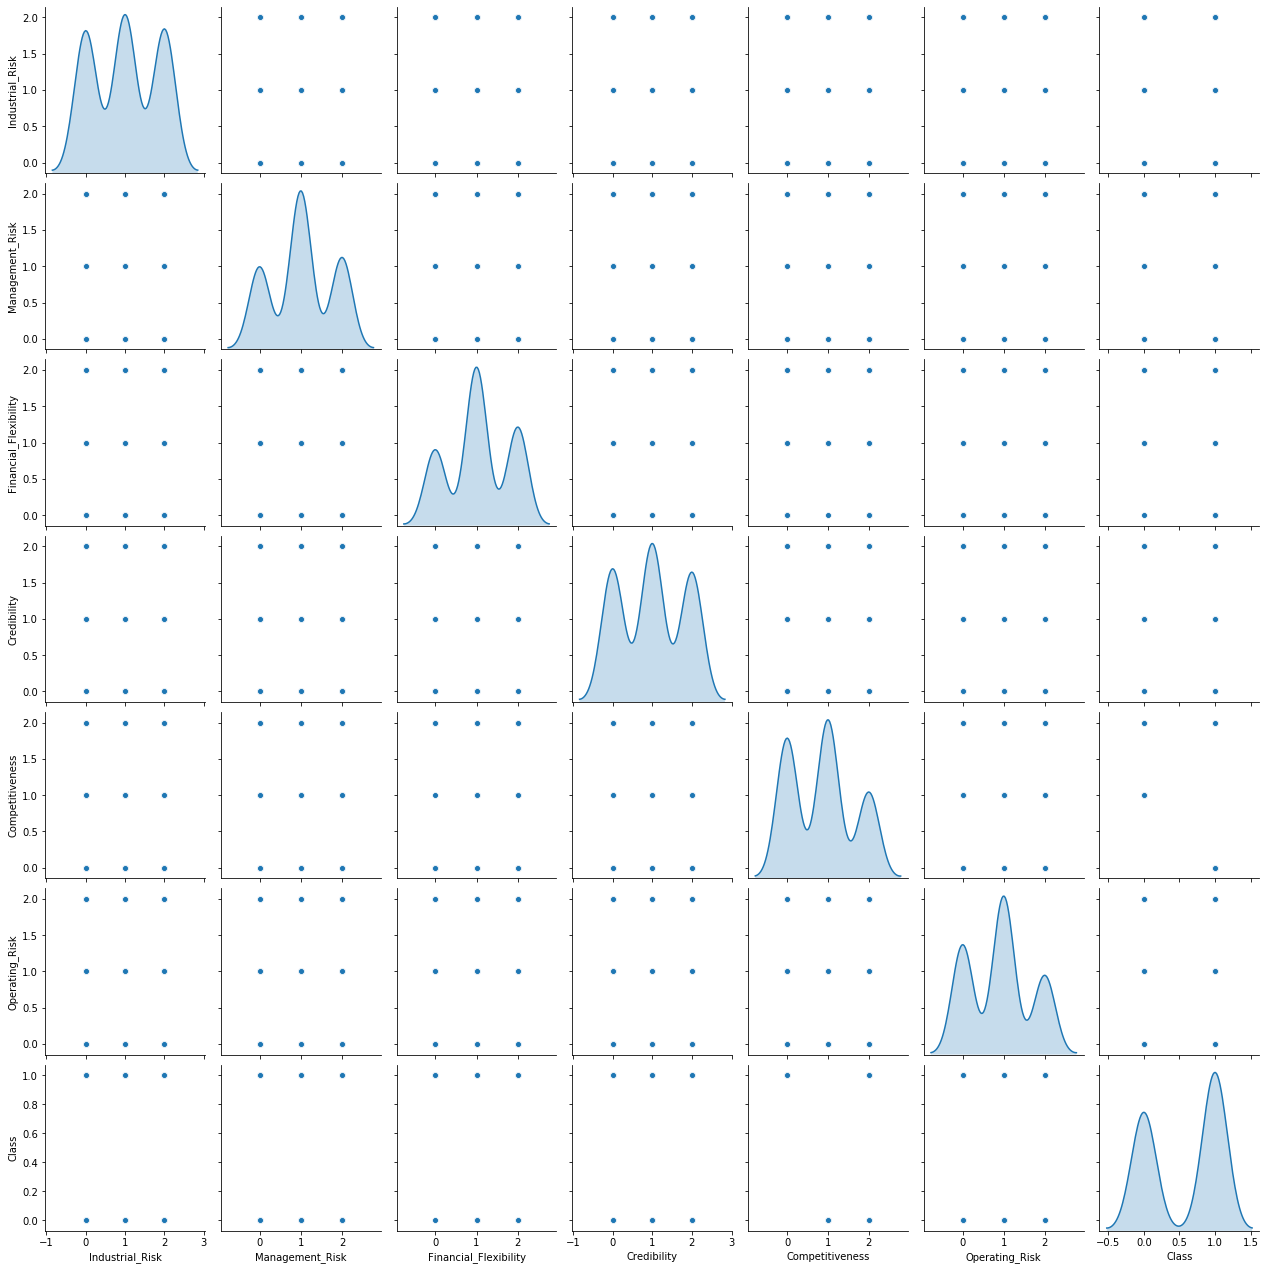

In [348]:
sns.pairplot(bank_note,diag_kind='kde') #by visualizing can see 3 clusters formed 

## 5. Apply KMeans or hierarchical clustering algorithm on the above data. (5 points)

In [349]:
from scipy.stats import zscore
bank_note_x_z=bank_note_x.apply(zscore)
bank_note_x_z.head()


,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk
0,-1.251112,-1.421192,1.293228,1.276117,1.512091,-1.24540
1,-0.004985,-0.038709,1.293228,1.276117,1.512091,0.12017
2,1.241143,1.343773,1.293228,1.276117,1.512091,1.48574
3,-1.251112,-1.421192,-1.481939,-1.255861,-1.140700,-1.24540
4,-0.004985,-0.038709,-1.481939,-1.255861,-1.140700,0.12017


In [350]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
np.random.seed=3

In [221]:
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(bank_note_x)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,728.435755
1,3,641.072851
2,4,578.150400
3,5,548.278783
4,6,484.727738
5,7,463.047992
6,8,426.874512
7,9,403.117098


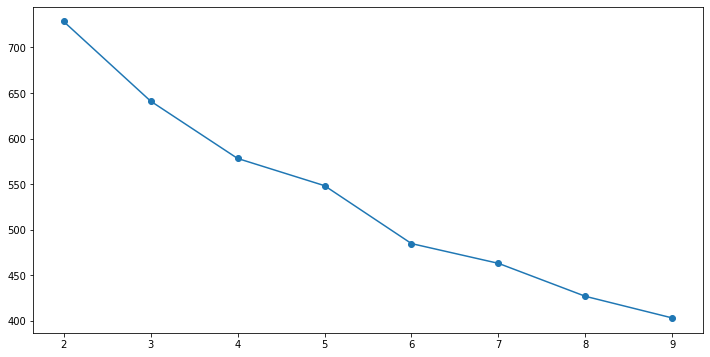

In [222]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

## 6. Select optimal number of clusters and form clusters of the data. (3 points)

In [358]:
#Choosing 4 as the optimal value of K or no of cluster
4 #is the optimal no of clusters

4

In [359]:
kmeans = KMeans(n_clusters=4) #as by elbow method 4 is optimal
# no of clusters i choose as 4 based on many iterration on accuracy score and confusion matrix

In [360]:
kmeans.fit(bank_note_x_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [361]:
kmeans.labels_

array([1, 1, 2, 3, 3, 2, 0, 1, 0, 1, 3, 1, 0, 1, 0, 0, 1, 3, 3, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 3, 3, 3, 0, 1, 0, 1, 3, 1, 2, 1, 0, 2, 3, 1, 1,
       1, 3, 3, 3, 1, 1, 3, 1, 1, 2, 2, 0, 3, 1, 3, 3, 2, 0, 0, 2, 3, 0,
       3, 3, 1, 3, 0, 0, 3, 1, 0, 0, 0, 0, 2, 0, 2, 0, 3, 0, 1, 0, 3, 0,
       3, 2, 0, 0, 2, 0, 3, 1, 3, 0, 0, 3, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1,
       2, 3, 3, 2, 0, 1, 0, 1, 3, 1, 0, 1, 0, 0, 1, 3, 3, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 3, 3, 3, 0, 1, 0, 1, 2, 3, 1, 1, 2, 2, 0, 2, 1, 1, 0,
       3, 2, 2, 2, 2, 2, 0, 2, 2, 3, 3, 3, 0, 2, 2, 2, 1, 1, 3, 2, 2, 2,
       3, 1, 1, 0, 2, 2, 0, 0, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 0, 0, 2, 1, 3, 3, 3, 0, 2, 2, 2, 1, 0, 3, 2, 2, 3, 3, 0, 2, 2,
       0, 2, 2, 3, 3, 3, 0, 2, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 1, 2, 2, 0,
       2, 1, 1, 0, 3, 2, 2, 2])

In [362]:
centroids = kmeans.cluster_centers_ # Since the data has more than 2 dimension we cannot visualize the data. 
#As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [363]:
centroid_df = pd.DataFrame(centroids, columns = bank_note_x_z.columns)

In [364]:
centroid_df

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk
0,0.102440,-0.014874,0.790827,-0.797486,0.162826,-0.868691
1,-0.090924,-0.825294,0.049187,1.123325,0.162826,-0.350716
2,0.554175,0.563911,0.030171,0.058820,0.066660,0.995535
3,-0.783814,0.084726,-0.912039,-0.419404,-0.430131,-0.123682


## 7. Create a new column in the data and populate it with the cluster labels. (2 points)

In [365]:
bank_note_x_z['label'] = kmeans.labels_

In [366]:
bank_note_x_z.groupby('label').size()

label
0    58
1    58
2    78
3    56
dtype: int64

In [388]:
bank_note_x_z

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,label
0,-1.251112,-1.421192,1.293228,1.276117,1.512091,-1.24540,1
1,-0.004985,-0.038709,1.293228,1.276117,1.512091,0.12017,1
2,1.241143,1.343773,1.293228,1.276117,1.512091,1.48574,2
3,-1.251112,-1.421192,-1.481939,-1.255861,-1.140700,-1.24540,3
4,-0.004985,-0.038709,-1.481939,-1.255861,-1.140700,0.12017,3
...,...,...,...,...,...,...,...
245,-0.004985,-0.038709,1.293228,0.010128,0.185695,0.12017,0
246,-1.251112,-0.038709,-0.094356,0.010128,0.185695,0.12017,3
247,1.241143,-0.038709,-0.094356,0.010128,0.185695,0.12017,2
248,-0.004985,-0.038709,-0.094356,0.010128,0.185695,0.12017,2


## 8. Split the data into train and test set. (1 points)

In [389]:
from sklearn.model_selection import train_test_split
X = bank_note_x_z
y = bank_note_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## 9. Apply SVC model on train dataset and predict target for test dataset. (5 points)

In [390]:
from sklearn.svm import SVC 
svclassifier = SVC(kernel='poly', degree=2) 
svclassifier.fit(X_train, y_train)  

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [391]:
y_pred = svclassifier.predict(X_test)  

In [392]:
svclassifier.score(X_train,y_train)

0.9942857142857143

In [393]:
svclassifier.score(X_test,y_test)

0.9866666666666667

In [394]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  

[[34  0]
 [ 1 40]]


In [395]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel = 'rbf',C=3)      # trying with rbf kernel 
svclassifier.fit(X_train, y_train)  

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [373]:
y_pred = svclassifier.predict(X_test)  

In [374]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  

[[34  0]
 [ 0 41]]


In [375]:
svclassifier.score(X_train,y_train)

1.0

In [376]:
svclassifier.score(X_test,y_test) #Test data score

1.0

In [377]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel = 'linear')      # try with linear kernel 
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [378]:
y_pred = svclassifier.predict(X_test)  

In [379]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  

[[27  7]
 [ 9 32]]


In [380]:
svclassifier.score(X_test,y_test)

0.7866666666666666

In [396]:
#with rbf kernel train and test data both the data have accuracy 1